In [27]:
### Importing Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Extract Features From Datetime Attributes

In [28]:
df = pd.read_csv("daily-minimum-temperatures.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.rename(columns = {"Date": "date", "Daily minimum temperatures": "temperature"})
df.head()

,date,temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [29]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek
df["is_weekend"] = np.where(df["day_of_week"].isin([5, 6]), 1, 0)


# Define function for European seasons
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

# Apply to your DataFrame
df["season"] = df["month"].apply(assign_season)

df.head(10)

,date,temperature,year,month,quarter,day_of_week,is_weekend,season
0,1981-01-01,20.7,1981,1,1,3,0,Winter
1,1981-01-02,17.9,1981,1,1,4,0,Winter
2,1981-01-03,18.8,1981,1,1,5,1,Winter
3,1981-01-04,14.6,1981,1,1,6,1,Winter
4,1981-01-05,15.8,1981,1,1,0,0,Winter
5,1981-01-06,15.8,1981,1,1,1,0,Winter
6,1981-01-07,15.8,1981,1,1,2,0,Winter
7,1981-01-08,17.4,1981,1,1,3,0,Winter
8,1981-01-09,21.8,1981,1,1,4,0,Winter
9,1981-01-10,20.0,1981,1,1,5,1,Winter


In [30]:
# Create lag features
df["temp_lag1"] = df["temperature"].shift(1)
df["temp_lag2"] = df["temperature"].shift(2)
df["temp_lag3"] = df["temperature"].shift(3)

## Task One: Exploratory Data Analysis (EDA)

In [31]:
df.isnull().sum()

date           0
temperature    0
year           0
month          0
quarter        0
day_of_week    0
is_weekend     0
season         0
temp_lag1      1
temp_lag2      2
temp_lag3      3
dtype: int64

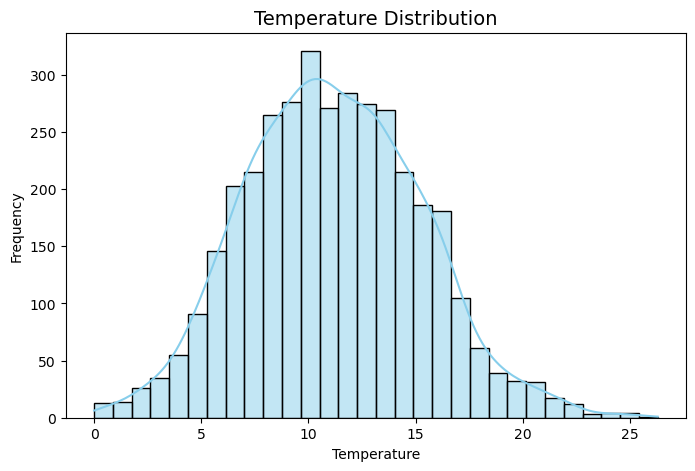

In [32]:
# Histogram of temperature
plt.figure(figsize=(8,5))
sns.histplot(df["temperature"], bins=30, kde=True, color="skyblue")
plt.title("Temperature Distribution", fontsize=14)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

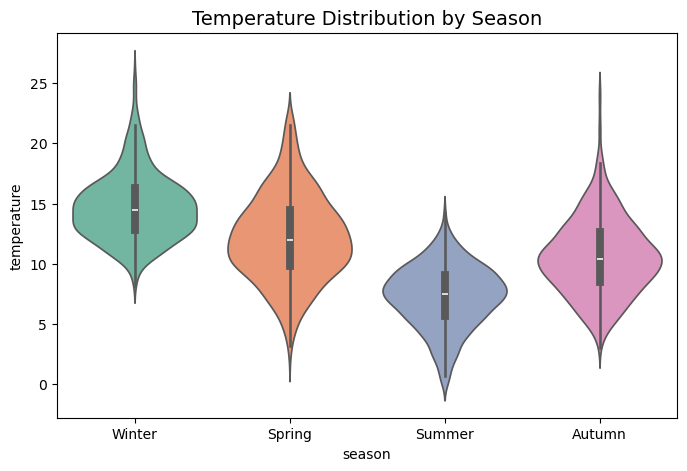

In [33]:
# Temperature by season
plt.figure(figsize=(8,5))
sns.violinplot(x="season", y="temperature", data=df, palette="Set2")
plt.title("Temperature Distribution by Season", fontsize=14)
plt.show()

In [34]:
print(df["is_weekend"].describe())
print(df["is_weekend"].value_counts(normalize=True) * 100)

count    3650.000000
mean        0.285753
std         0.451834
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_weekend, dtype: float64
is_weekend
0    71.424658
1    28.575342
Name: proportion, dtype: float64


In [35]:
print(df["day_of_week"].describe())
print(df["day_of_week"].value_counts(normalize=True) * 100)

count    3650.000000
mean        3.001096
std         2.000137
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: day_of_week, dtype: float64
day_of_week
3    14.301370
4    14.301370
6    14.301370
5    14.273973
0    14.273973
1    14.273973
2    14.273973
Name: proportion, dtype: float64


In [36]:
print(df["temperature"].describe())
print(df["temp_lag1"].describe())
print(df["temp_lag2"].describe())
print(df["temp_lag3"].describe())

count    3650.000000
mean       11.177753
std         4.071837
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: temperature, dtype: float64
count    3649.000000
mean       11.177254
std         4.072283
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: temp_lag1, dtype: float64
count    3648.000000
mean       11.176014
std         4.072153
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: temp_lag2, dtype: float64
count    3647.000000
mean       11.175377
std         4.072529
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: temp_lag3, dtype: float64


In [37]:
print(df["quarter"].describe())
print(df["quarter"].value_counts(normalize=True) * 100)

count    3650.000000
mean        2.507945
std         1.116933
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: quarter, dtype: float64
quarter
3    25.205479
4    25.150685
2    24.931507
1    24.712329
Name: proportion, dtype: float64


In [38]:
print(df["season"].describe())
print(df["season"].value_counts(normalize=True) * 100)

count       3650
unique         4
top       Spring
freq         920
Name: season, dtype: object
season
Spring    25.205479
Summer    25.205479
Autumn    24.931507
Winter    24.657534
Name: proportion, dtype: float64


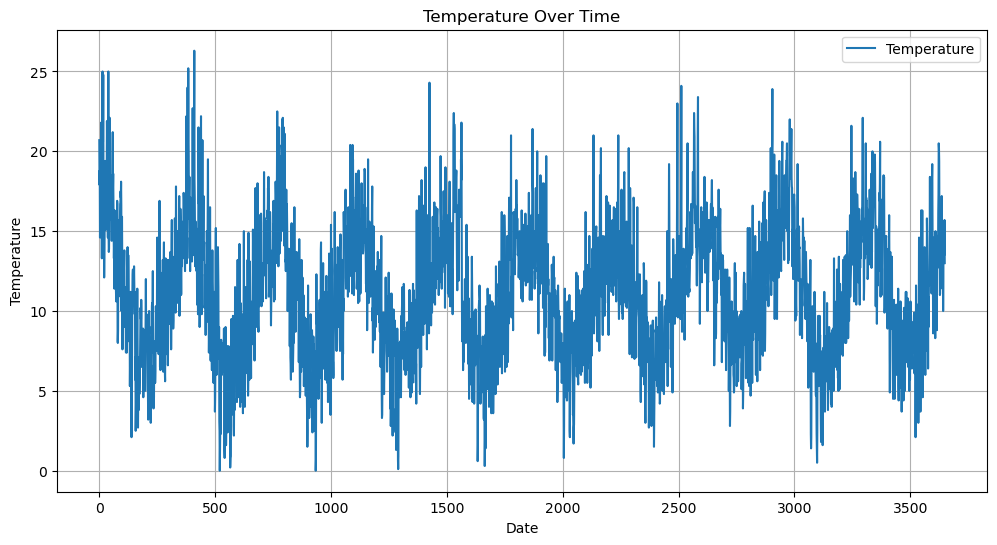

In [39]:
# Plot temperature over time
plt.figure(figsize=(12,6))
plt.plot(df.index, df["temperature"], label="Temperature")
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.grid(True)
plt.legend()
plt.show()

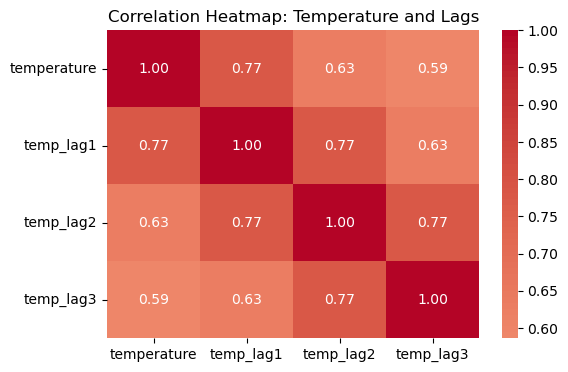

In [40]:

# Select temperature and lag variables
cols = ["temperature", "temp_lag1", "temp_lag2", "temp_lag3"]

# Compute correlation matrix
corr_matrix = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")

plt.title("Correlation Heatmap: Temperature and Lags")
plt.show()


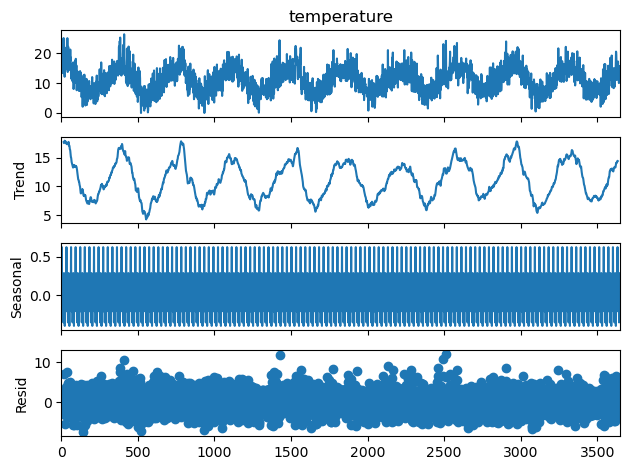

In [41]:
###Seasonal decomposition to detect patterns 
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["temperature"], model="additive", period=30)  # period depends on your data (e.g., 7 for weekly seasonality)
result.plot()
plt.show()

### Task Two: Data Preprocessing and Feature Engineering

In [42]:
IQR = df["temperature"].quantile(0.75) - df["temperature"].quantile(0.25)
Lower = df["temperature"].quantile(0.25) - (IQR * 1.5)
Upper = df["temperature"].quantile(0.75) + (IQR * 1.5)

outliers_iqr = df[(df["temperature"] < Lower) | (df["temperature"] > Upper)][["temperature"]]
print('Temperature outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower, upperboundary=Upper))
print("Temperature outliers (IQR method):")
print(outliers_iqr)

Temperature outliers are values < -0.24999999999999822 or > 22.549999999999997
Temperature outliers (IQR method):
      temperature
14           25.0
17           24.8
39           25.0
381          24.0
384          25.2
403          22.7
409          22.8
410          26.3
1425         24.3
2495         23.0
2512         24.1
2584         23.4
2905         23.9


In [43]:
mean = df["temperature"].mean() 
std = df["temperature"].std() 
df["z_score"] = (df["temperature"] - mean) / std

outliers_z = df[(df["z_score"].abs() > 3)][["temperature", "z_score"]]

print("Z-score Outliers:")
print(outliers_z)

Z-score Outliers:
      temperature   z_score
14           25.0  3.394597
17           24.8  3.345479
39           25.0  3.394597
381          24.0  3.149008
384          25.2  3.443715
410          26.3  3.713864
1425         24.3  3.222685
2512         24.1  3.173567
2584         23.4  3.001654
2905         23.9  3.124449


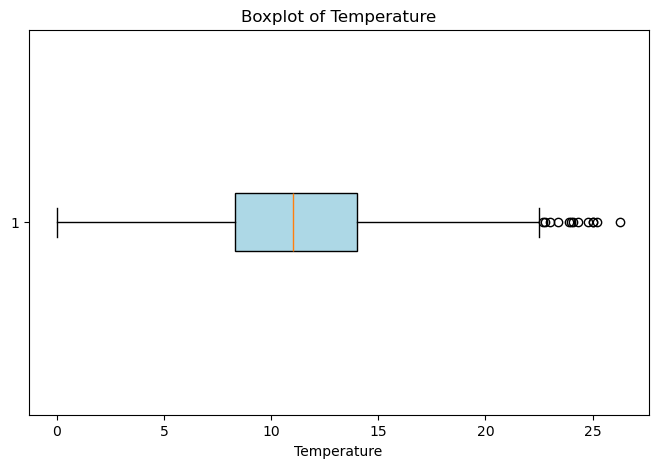

In [44]:
plt.figure(figsize=(8, 5))

# Box and Whisker plot
plt.boxplot(df["temperature"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of Temperature")
plt.xlabel("Temperature")

plt.show()

In [45]:
# Removing outliers using IQR method
df_capped = df.copy()
df_capped["temperature"] = df_capped["temperature"].clip(Lower, Upper)

In [46]:
df_capped.head()

,date,temperature,year,month,quarter,day_of_week,is_weekend,season,temp_lag1,temp_lag2,temp_lag3,z_score
0,1981-01-01,20.7,1981,1,1,3,0,Winter,NaN,NaN,NaN,2.338563
1,1981-01-02,17.9,1981,1,1,4,0,Winter,20.7,NaN,NaN,1.650913
2,1981-01-03,18.8,1981,1,1,5,1,Winter,17.9,20.7,NaN,1.871943
3,1981-01-04,14.6,1981,1,1,6,1,Winter,18.8,17.9,20.7,0.840467
4,1981-01-05,15.8,1981,1,1,0,0,Winter,14.6,18.8,17.9,1.135175


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform
df_capped["temperature_scaled"] = scaler.fit_transform(df[["temperature"]])
df_capped["temp_lag1S"] = scaler.fit_transform(df[["temp_lag1"]])
df_capped["temp_lag2S"] = scaler.fit_transform(df[["temp_lag2"]])
df_capped["temp_lag3S"] = scaler.fit_transform(df[["temp_lag3"]])

print(df_capped.head())


        date  temperature  year  month  quarter  day_of_week  is_weekend  \
0 1981-01-01         20.7  1981      1        1            3           0   
1 1981-01-02         17.9  1981      1        1            4           0   
2 1981-01-03         18.8  1981      1        1            5           1   
3 1981-01-04         14.6  1981      1        1            6           1   
4 1981-01-05         15.8  1981      1        1            0           0   

   season  temp_lag1  temp_lag2  temp_lag3   z_score  temperature_scaled  \
0  Winter        NaN        NaN        NaN  2.338563            2.338883   
1  Winter       20.7        NaN        NaN  1.650913            1.651139   
2  Winter       17.9       20.7        NaN  1.871943            1.872199   
3  Winter       18.8       17.9       20.7  0.840467            0.840583   
4  Winter       14.6       18.8       17.9  1.135175            1.135330   

   temp_lag1S  temp_lag2S  temp_lag3S  
0         NaN         NaN         NaN  
1    2

In [48]:
df_capped.drop(columns = ["temp_lag1","temp_lag2","temp_lag3","z_score","temperature"], inplace = True)

In [49]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                3650 non-null   datetime64[ns]
 1   year                3650 non-null   int32         
 2   month               3650 non-null   int32         
 3   quarter             3650 non-null   int32         
 4   day_of_week         3650 non-null   int32         
 5   is_weekend          3650 non-null   int32         
 6   season              3650 non-null   object        
 7   temperature_scaled  3650 non-null   float64       
 8   temp_lag1S          3649 non-null   float64       
 9   temp_lag2S          3648 non-null   float64       
 10  temp_lag3S          3647 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(5), object(1)
memory usage: 242.5+ KB


In [50]:
# Use actual temperature values to fill missing lags
df_capped['temp_lag1S'].fillna(method='bfill', inplace=True)
df_capped['temp_lag2S'].fillna(method='bfill', inplace=True)
df_capped['temp_lag3S'].fillna(method='bfill', inplace=True)

df_capped.head()

,date,year,month,quarter,day_of_week,is_weekend,season,temperature_scaled,temp_lag1S,temp_lag2S,temp_lag3S
0,1981-01-01,1981,1,1,3,0,Winter,2.338883,2.338750,2.339129,2.339070
1,1981-01-02,1981,1,1,4,0,Winter,1.651139,2.338750,2.339129,2.339070
2,1981-01-03,1981,1,1,5,1,Winter,1.872199,1.651081,2.339129,2.339070
3,1981-01-04,1981,1,1,6,1,Winter,0.840583,1.872117,1.651438,2.339070
4,1981-01-05,1981,1,1,0,0,Winter,1.135330,0.840613,1.872482,1.651442


In [51]:
# Method 1: Using map() with dictionary
season_mapping = {
    'Winter': 1,
    'Autumn': 2, 
    'Spring': 3,
    'Summer': 4
}

# Apply the mapping
df_capped['season_numeric'] = df_capped['season'].map(season_mapping)

df_capped.drop(columns=["month", 'season'], inplace=True)

df_capped.head()

,date,year,quarter,day_of_week,is_weekend,temperature_scaled,temp_lag1S,temp_lag2S,temp_lag3S,season_numeric
0,1981-01-01,1981,1,3,0,2.338883,2.338750,2.339129,2.339070,1
1,1981-01-02,1981,1,4,0,1.651139,2.338750,2.339129,2.339070,1
2,1981-01-03,1981,1,5,1,1.872199,1.651081,2.339129,2.339070,1
3,1981-01-04,1981,1,6,1,0.840583,1.872117,1.651438,2.339070,1
4,1981-01-05,1981,1,0,0,1.135330,0.840613,1.872482,1.651442,1


In [53]:
df_capped = df_capped.set_index("date")
df_capped.head()

,year,quarter,day_of_week,is_weekend,temperature_scaled,temp_lag1S,temp_lag2S,temp_lag3S,season_numeric
date,,,,,,,,,
1981-01-01,1981,1,3,0,2.338883,2.338750,2.339129,2.339070,1
1981-01-02,1981,1,4,0,1.651139,2.338750,2.339129,2.339070,1
1981-01-03,1981,1,5,1,1.872199,1.651081,2.339129,2.339070,1
1981-01-04,1981,1,6,1,0.840583,1.872117,1.651438,2.339070,1
1981-01-05,1981,1,0,0,1.135330,0.840613,1.872482,1.651442,1


### Declaring feature vector and target variable

In [54]:
X = df_capped.drop(['temperature_scaled'], axis=1)
y = df_capped['temperature_scaled']

In [55]:
print(X.head())
print(y.head())

            year  quarter  day_of_week  is_weekend  temp_lag1S  temp_lag2S  \
date                                                                         
1981-01-01  1981        1            3           0    2.338750    2.339129   
1981-01-02  1981        1            4           0    2.338750    2.339129   
1981-01-03  1981        1            5           1    1.651081    2.339129   
1981-01-04  1981        1            6           1    1.872117    1.651438   
1981-01-05  1981        1            0           0    0.840613    1.872482   

            temp_lag3S  season_numeric  
date                                    
1981-01-01    2.339070               1  
1981-01-02    2.339070               1  
1981-01-03    2.339070               1  
1981-01-04    2.339070               1  
1981-01-05    1.651442               1  
date
1981-01-01    2.338883
1981-01-02    1.651139
1981-01-03    1.872199
1981-01-04    0.840583
1981-01-05    1.135330
Name: temperature_scaled, dtype: float64


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Check new column names
print(X.columns)

### Spliting the data into 70% training, 15% Testing and 15% Validation

In [57]:
# First split: 70% train, 30% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Second split: 15% validation, 15% test (half of the 30%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (2555, 8) (2555,)
Validation: (547, 8) (547,)
Test: (548, 8) (548,)


### Fitting the RandomForest Model

In [58]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print(y_pred[:10])

[ 0.26852656 -0.86477821 -0.01934366 -0.66803414  0.63941737  0.89830407
 -0.29345898  0.3935487  -0.89179674  0.91132209]


### Evaluation Matrics

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.3755
Mean Absolute Error (MAE): 0.4783
R-squared (R²): 0.6335


### Feature Importance

          Feature  Importance
4      temp_lag1S    0.635933
6      temp_lag3S    0.096315
5      temp_lag2S    0.086029
7  season_numeric    0.070298
0            year    0.043767
2     day_of_week    0.035606
1         quarter    0.027476
3      is_weekend    0.004575


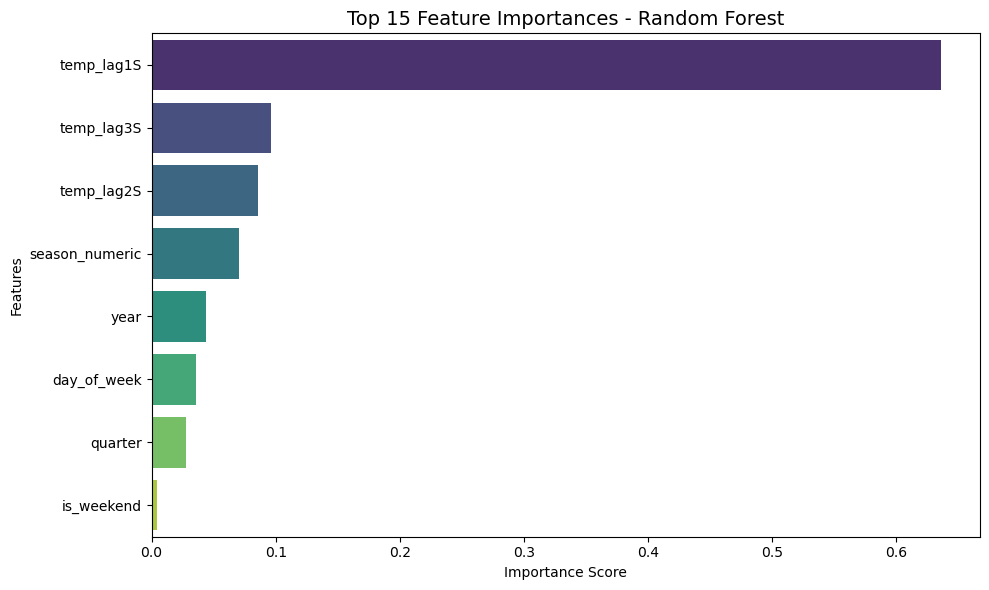

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Feature Importance ---
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy plotting
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_imp.head(10))  # top 10 important features

# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15), palette="viridis")
plt.title("Top 15 Feature Importances - Random Forest", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

### Validation using the GridSearchCV

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],    # number of trees
    "max_depth": [None, 10, 20, 30],    # depth of trees
    "min_samples_split": [2, 5, 10],    # min samples to split
    "min_samples_leaf": [1, 2, 4],      # min samples at leaf
    "max_features": ["sqrt", "log2"]    # number of features to consider
}

# GridSearch with 5-fold CV on training set
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="r2",
    verbose=2
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on validation set
val_score = grid_search.best_estimator_.score(X_val, y_val)
print("Validation R²:", val_score)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Validation R²: 0.6741335494832863


### Hyperparameter Tuning

In [62]:
best_model = grid_search.best_estimator_

# Test set performance
test_score = best_model.score(X_test, y_test)
print("Test R²:", test_score)

Test R²: 0.6533947363033707


### The Prophet Model

In [66]:
# Reset index once, keep all columns
df_prophet = df_capped.reset_index()

# Rename for Prophet
df_prophet = df_prophet.rename(columns={"date": "ds", "temperature_scaled": "y"})

#df_prophet = df_prophet.set_index("ds")

# Keep necessary columns (target + regressors)
df_prophet = df_prophet[["ds", "y", "is_weekend", "year", "quarter", "day_of_week", "season_numeric", "temp_lag1S", "temp_lag2S", "temp_lag3S"]]

df_prophet.head()

,ds,y,is_weekend,year,quarter,day_of_week,season_numeric,temp_lag1S,temp_lag2S,temp_lag3S
0,1981-01-01,2.338883,0,1981,1,3,1,2.338750,2.339129,2.339070
1,1981-01-02,1.651139,0,1981,1,4,1,2.338750,2.339129,2.339070
2,1981-01-03,1.872199,1,1981,1,5,1,1.651081,2.339129,2.339070
3,1981-01-04,0.840583,1,1981,1,6,1,1.872117,1.651438,2.339070
4,1981-01-05,1.135330,0,1981,1,0,1,0.840613,1.872482,1.651442


In [69]:
from prophet import Prophet

# Check new column names
print(df_prophet.columns)

Index(['ds', 'y', 'is_weekend', 'year', 'quarter', 'day_of_week',
       'season_numeric', 'temp_lag1S', 'temp_lag2S', 'temp_lag3S'],
      dtype='object')


### Train-Test Split for Prophet

In [70]:
# Split into 70% train, 15% validation, 15% test
train_size = int(len(df_prophet) * 0.7)
val_size = int(len(df_prophet) * 0.15)
# test_size will be the remainder

# Create splits
df_train = df_prophet.iloc[:train_size]
df_val = df_prophet.iloc[train_size:train_size + val_size]
df_test = df_prophet.iloc[train_size + val_size:]

## Define and Fit Prophet Model

In [71]:
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

# Add regressors (must exist in train & test)
m.add_regressor("is_weekend")
m.add_regressor("year")
m.add_regressor("quarter")
m.add_regressor("day_of_week")
m.add_regressor("season_numeric")
m.add_regressor("temp_lag1S")
m.add_regressor("temp_lag2S")
m.add_regressor("temp_lag3S")


# Fit model
m.fit(df_train)

08:53:34 - cmdstanpy - INFO - Chain [1] start processing
08:53:36 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
# Use test set as future dataframe
future = df_test[['ds','is_weekend', 'year', 'quarter', 'day_of_week',
       'season_numeric', 'temp_lag1S', 'temp_lag2S', 'temp_lag3S']]

forecast = m.predict(future)
forecast[["ds","yhat", "yhat_lower", "yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,1989-07-02,-1.308690,-2.077249,-0.553822
1,1989-07-03,-0.983063,-1.772989,-0.206430
2,1989-07-04,-0.700184,-1.440958,0.072080
3,1989-07-05,-1.166222,-1.903093,-0.421351
4,1989-07-06,-1.351423,-2.107704,-0.558991


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true = df_test["y"].values
y_pred = forecast["yhat"].values

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("Prophet Results:")
print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


Prophet Results:
MSE: 0.29593806470407485
MAE: 0.4279610436820753
R²: 0.6772530859362903


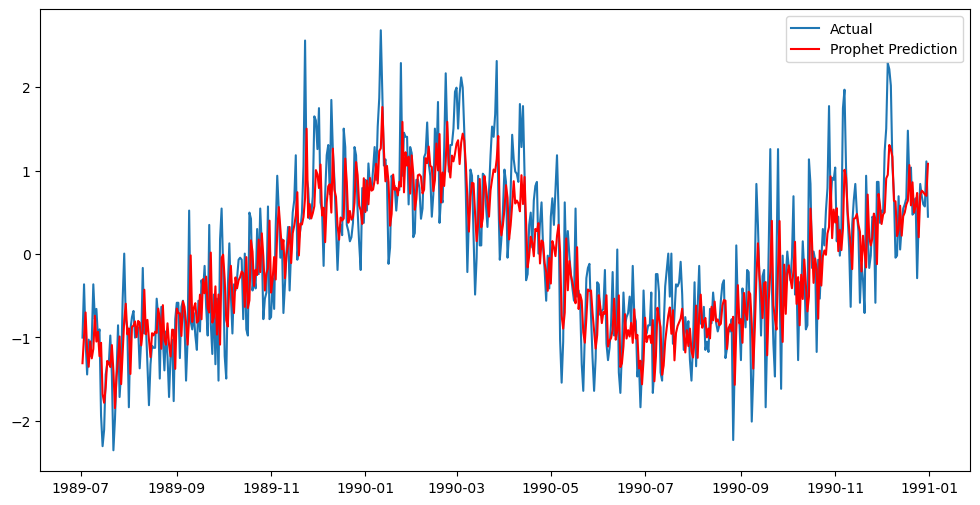

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_test["ds"], y_true, label="Actual")
plt.plot(df_test["ds"], y_pred, label="Prophet Prediction", color="red")
plt.legend()
plt.show()
